<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadedatosabiertoscmszmumu-Zomeb0dy/blob/main/Delfin2022_CMSOpenDataZtoMuMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis de datos (muon-muon)**


Francisco Porfirio Gonzalez Santos

Programa Delfin 25/06/25

**DATOS Y BIBLIOTECAS A UTILIZAR**

In [19]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles.head()
#Datos a Utilizar:
print(particles)

         Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
0     165617    74969122  54.7055 -0.4324  2.5742   1 -0.0745  0.4999   
1     165617    75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000   
2     165617    75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000   
3     165617    75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000   
4     165617    75098104  41.2998 -0.1571 -3.0408   1 -0.0305  1.2280   
...      ...         ...      ...     ...     ...  ..     ...     ...   
9995  173692  1245050481   8.9721 -1.6158 -2.7176   1 -0.0294  8.7183   
9996  173692  1244979327  39.4543 -1.1310 -2.0568   1  0.0417  0.0000   
9997  173692  1245305163  40.6034 -1.5051 -1.6758  -1  0.0635  0.2012   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361  0.0000   
9999  173692  1244770092  40.7389  1.1202 -0.2863  -1  0.0670  0.6457   

          pt2    eta2    phi2  Q2    dxy2    iso2  
0     34.2464 -0.9885 -0.4987  -1  0.0712  3.4221  
1     28.5389  0.38

**Información de los datos:**

**Donde:**

**Run:** es el numero de corrida del evento  (variable entera)

**Event:** es el numero del evento (variable entera)

**pt1 y pt2:** son los momentos transversos para cada muon(o jet), (Variable decimal)

**eta1 y eta2**: son la pseudo rapidez de cada muon(o jet), la pseudorapidez, es la coordenada que describe el angulo de una particula (o jet), relativo al eje del haz, cuando esta es 0, implica que la particula generada es perpendicular al eje y cuando este es mayor, implica que la particula que es mas cercana al eje. (Variable decimal)

**phi1 y phi2**: es el angulo de la particula con respecto al eje x (Variable decimal)

**Q1 y Q2**: son las cargas de cada particula (variable entera)

**dxy1 y dxy2**:son los parámetros de impacto en el plano transversal con respecto al vértice dek muón, herramienta clave para distinguir entre muones producidos directamente en la interacción y aquellos provenientes de decaimientos secundarios. (Variable decimal).

**iso1 y iso2**: es el aislamiento comvinado de (track + Ecal + Hcal), nos ayuda a diferenciar si se trata de un jet o una particula.

In [3]:
#Información sobre los datos a anaizar
particles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10000 non-null  int64  
 1   Event   10000 non-null  int64  
 2   pt1     10000 non-null  float64
 3   eta1    10000 non-null  float64
 4   phi1    10000 non-null  float64
 5   Q1      10000 non-null  int64  
 6   dxy1    10000 non-null  float64
 7   iso1    10000 non-null  float64
 8   pt2     10000 non-null  float64
 9   eta2    10000 non-null  float64
 10  phi2    10000 non-null  float64
 11  Q2      10000 non-null  int64  
 12  dxy2    10000 non-null  float64
 13  iso2    10000 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB


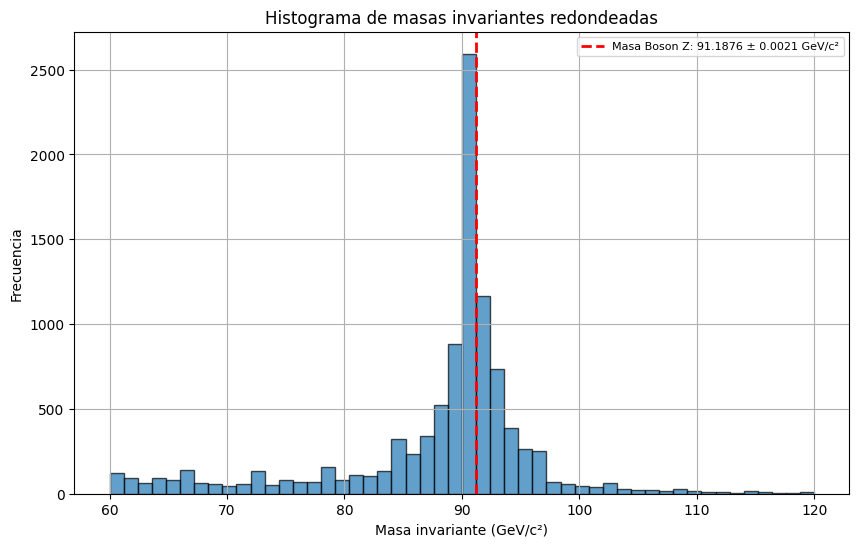

In [32]:
#Histograma de Masas para los Datos puros

# Crear la lista de masas invariantes (sin redondear)
M_i = np.sqrt( 2 * particles['pt1'] * particles['pt2'] * (np.cosh(particles['eta1'] - particles['eta2']) - np.cos(particles['phi1'] - particles['phi2'])))

# Crear la lista de masas redondeadas
masas_redondeadas = np.round(M_i).tolist()

# Crear el histograma de las masas redondeadas
plt.figure(figsize=(10, 6))
plt.hist(masas_redondeadas, bins=50, edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()



**Filtración Por Cargas**

In [8]:
#Conteo de datos para cada carga
A = particles['Q1'].value_counts()
print(A)
B = particles['Q2'].value_counts()
print(B)


Q1
-1    5156
 1    4844
Name: count, dtype: int64
Q2
 1    5192
-1    4808
Name: count, dtype: int64


In [9]:
#Conteo de eventos con carga diferente (mejores candidatos a Bosones Z)
eventos_diferentes = particles[particles['Q1'] != particles['Q2']]
print("Eventos con Q1 ≠ Q2:")
print(eventos_diferentes.head())
print("Número de eventos con cargas diferentes:", len(eventos_diferentes))

Eventos con Q1 ≠ Q2:
      Run     Event      pt1    eta1    phi1  Q1    dxy1    iso1      pt2  \
0  165617  74969122  54.7055 -0.4324  2.5742   1 -0.0745  0.4999  34.2464   
1  165617  75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000  28.5389   
2  165617  75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000  30.2344   
3  165617  75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000  48.2790   
4  165617  75098104  41.2998 -0.1571 -3.0408   1 -0.0305  1.2280  43.4508   

     eta2    phi2  Q2    dxy2    iso2  
0 -0.9885 -0.4987  -1  0.0712  3.4221  
1  0.3852 -1.9912   1  0.0515  0.0000  
2 -0.4684  1.8833   1 -0.0876  0.0000  
3 -0.1956  2.9703  -1 -0.0492  0.0000  
4  0.5910 -0.0428  -1  0.0442  0.0000  
Número de eventos con cargas diferentes: 9664


In [12]:
#Conteo de eventos con carga iguales (Malos candidatos a Bosones Z)
eventos_iguales = particles[particles['Q1'] == particles['Q2']]
print("Eventos con Q1 = Q2:")
print(eventos_iguales.head())
print("Número de eventos con cargas iguales:", len(eventos_iguales))

T = len(eventos_iguales)*100/10000
print("Porcentaje de eventos con carga igual en la base de datos",T)

Eventos con Q1 = Q2:
        Run      Event      pt1    eta1    phi1  Q1    dxy1      iso1  \
19   165617   78693707  21.3986 -1.6865  0.0905   1  0.0263    4.4573   
95   165617   94212340  14.9992  1.6421  2.4363  -1 -0.3397    0.0000   
113  165617   96375401  21.9996  1.1763  2.1764   1 -0.0834  184.7280   
157  165617  104730772  36.2004  1.4893  0.4355  -1  0.0026    1.3959   
165  165617  106617185  17.2939 -1.2052  0.7373   1 -0.0290    0.6563   

         pt2    eta2    phi2  Q2    dxy2      iso2  
19   10.8491  1.2098  3.0488   1 -0.0430   38.1065  
95   22.7487 -0.7225 -0.2626  -1  0.0581    2.3225  
113  33.9558  0.0720 -0.9118   1  0.0808  112.7960  
157  11.9339 -0.6476 -2.1759  -1  0.0349    2.5531  
165  31.9684  0.2569 -2.2568   1  0.0337    2.6572  
Número de eventos con cargas iguales: 336
Porcentaje de eventos con carga igual en la base de datos 3.36


Es decir, hay 336 eventos en los que Q1 y Q2 son iguales, siendo esto un 3.36% de los eventos totales.

**Para diferenciar cuales eventos iguales son de carga -1 y de carga 1, realizamos el siguientes histograma**:

In [7]:
#Histograma diferenciación de cargas
px.histogram(particles, x='Q1', color='Q2', barmode='group',
             title="Distribución de cargas Q1 vs Q2").show()

Analizando el histograma podemos ver que, en 150 eventos las cargar son -1, eventos que podriamos asociar a decaimiento de bosones W-; y en 186 eventos las cargas son 1, eventos asociables a decaimiento de bosones W+. O en su defecto, podrian identificarse como jets mal interpretados como Muones.

**Para Purificar la lista de datos, se eliminaran los eventos con cargas iguales**

In [34]:
# Filtrar eventos donde Q1 ≠ Q2 (Mejores Candidatos a Boson Z)
eventos_Q_difs = particles[particles['Q1'] != particles['Q2']]
print("Eventos con cargas diferentes (Q1 ≠ Q2):")
print(eventos_Q_difs)
print("\nNúmero de eventos con cargas diferentes:", len(eventos_Q_difs))

Eventos con cargas diferentes (Q1 ≠ Q2):
         Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
0     165617    74969122  54.7055 -0.4324  2.5742   1 -0.0745  0.4999   
1     165617    75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000   
2     165617    75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000   
3     165617    75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000   
4     165617    75098104  41.2998 -0.1571 -3.0408   1 -0.0305  1.2280   
...      ...         ...      ...     ...     ...  ..     ...     ...   
9994  173692  1244153861  38.1252 -0.4428 -2.2370  -1  0.0311  0.0000   
9996  173692  1244979327  39.4543 -1.1310 -2.0568   1  0.0417  0.0000   
9997  173692  1245305163  40.6034 -1.5051 -1.6758  -1  0.0635  0.2012   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361  0.0000   
9999  173692  1244770092  40.7389  1.1202 -0.2863  -1  0.0670  0.6457   

          pt2    eta2    phi2  Q2    dxy2    iso2  
0     34.2464 -0.9885 -0.4987 

Construimos un nuevo histograma de masas para la lista filtrada

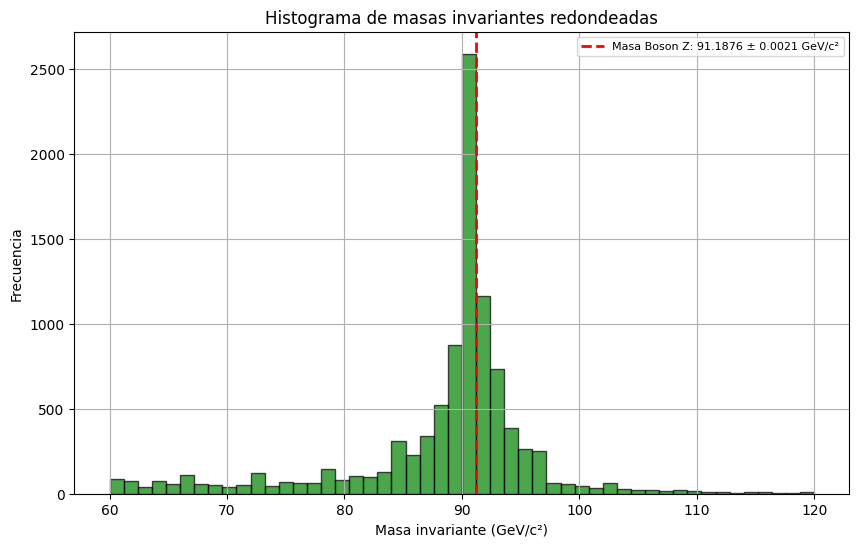

In [49]:
#Hisotgramas con filtro de cargas diferentes
# Crear la lista de masas invariantes (sin redondear)
M_i2 = np.sqrt(
    2 * eventos_Q_difs['pt1'] * eventos_Q_difs['pt2'] *
    (np.cosh(eventos_Q_difs['eta1'] - eventos_Q_difs['eta2']) -
     np.cos(eventos_Q_difs['phi1'] - eventos_Q_difs['phi2']))
)

# Crear la lista de masas redondeadas
M_r = np.round(M_i2)

# Crear el histograma de las masas redondeadas
fig = px.histogram(
    x=M_r,
    nbins=50,
    labels={'x': 'Masa invariante redondeada (GeV/c²)', 'y': 'Número de eventos'},
    title='Distribución de la masa invariante (Q1 ≠ Q2)',
    color_discrete_sequence=['indigo']
)
fig.add_vline(x=91, line_dash="dash", line_color="red", annotation_text="Masa del Z (91 GeV)")
#línea de referencia para el bosón Z (~91 GeV)
fig.update_layout(
    xaxis_title='Masa [GeV/c²]',
    yaxis_title='Eventos',
    showlegend=False
)

plt.figure(figsize=(10, 6))
plt.hist(M_r, bins=50, color='green', edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
fig.show()
plt.show()

**Filtración por Factor ISO:**

Para "purificar" mas los datos, consideraremos un factor de ISO=1, para separar los posibles muones, de hadrones que dejen rastro en Hcal/Ecal, se espera obtener un histograma con menos ruido.

In [47]:
# Filtrar eventos donde iso1 < 1 Y iso2 < 1
Filtro_ISO = eventos_Q_difs[
    (eventos_Q_difs['iso1'] <= 1) &
    (eventos_Q_difs['iso2'] <= 1)
]

# Calcular la masa invariante para estos eventos
M_i3 = np.sqrt(
    2 * Filtro_ISO['pt1'] * Filtro_ISO['pt2'] *
    (np.cosh(Filtro_ISO['eta1'] - Filtro_ISO['eta2']) -
     np.cos(Filtro_ISO['phi1'] - Filtro_ISO['phi2']))
)

print(Filtro_ISO)
# Mostrar el número de eventos que cumplen el criterio
print(f"Número de eventos con Q1 ≠ Q2 y aislamiento <= 1: {len(Filtro_ISO)}")

diff =len(eventos_Q_difs) - len(Filtro_ISO)
print("Diferencia entre los eventos filtrados por carga y filtrados por ISO:",diff)

         Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
1     165617    75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000   
2     165617    75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000   
3     165617    75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000   
5     165617    77255513  38.9425  0.3522 -2.2649  -1  0.0384  0.0000   
8     165617    77076988  38.1511 -0.8702  1.7165   1 -0.0840  0.0000   
...      ...         ...      ...     ...     ...  ..     ...     ...   
9993  173692  1243515245  52.7978  0.4135  1.7001   1 -0.0811  0.0000   
9994  173692  1244153861  38.1252 -0.4428 -2.2370  -1  0.0311  0.0000   
9996  173692  1244979327  39.4543 -1.1310 -2.0568   1  0.0417  0.0000   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361  0.0000   
9999  173692  1244770092  40.7389  1.1202 -0.2863  -1  0.0670  0.6457   

          pt2    eta2    phi2  Q2    dxy2   iso2  
1     28.5389  0.3852 -1.9912   1  0.0515  0.000  
2     30.2344 -0.4684

De los 9664 casos filtrados por carga, 2277 de estos no cumplen con el factor ISO considerado para filtrar, siendo esto un 23.56%, el nuevo histograma obtenido es:


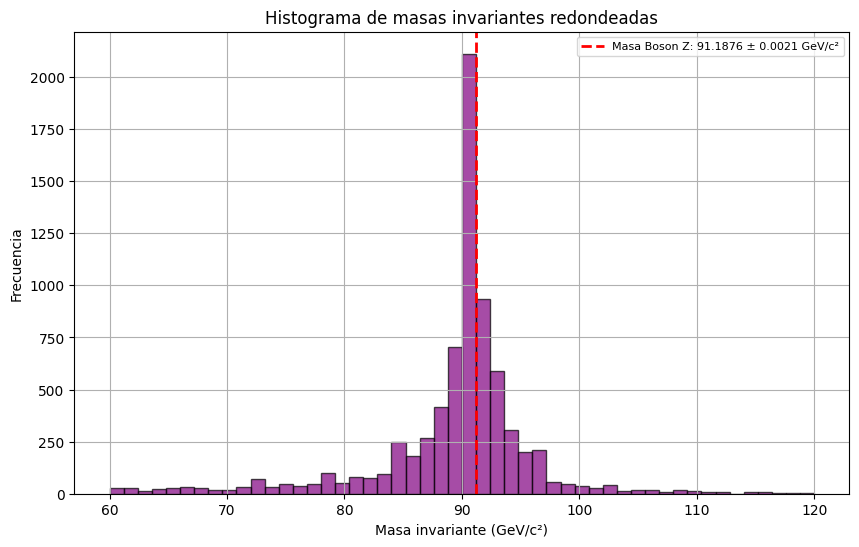

In [50]:
M_R1 = np.round(M_i3)

fig = px.histogram(
    x=M_R1,
    nbins=50,
    labels={'x': 'Masa invariante [GeV/c²]', 'y': 'Eventos'},
    title='Masa invariante para mejores candidatos para muones (Q1 ≠ Q2, iso <= 1)',
    color_discrete_sequence=['teal']
)
fig.add_vline(x=91, line_dash="dash", line_color="red", annotation_text="Masa del Z (91 GeV)")
fig.show()


plt.figure(figsize=(10, 6))
plt.hist(M_R1, bins=50, color='purple', edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

**Mejor Filtración por Factor ISO:**

Para "purificar" mas los datos, consideraremos un factor de ISO=0.5, para separar los posibles muones, de hadrones que dejen rastro en Hcal/Ecal, se espera obtener un histograma con menos ruido.

In [53]:
# Filtrar eventos donde iso1 < 1 Y iso2 < 1
Filtro_ISO2 = eventos_Q_difs[
    (eventos_Q_difs['iso1'] <= 0.5) &
    (eventos_Q_difs['iso2'] <= 0.5)
]

# Calcular la masa invariante para estos eventos
M_i4 = np.sqrt(
    2 * Filtro_ISO2['pt1'] * Filtro_ISO2['pt2'] *
    (np.cosh(Filtro_ISO2['eta1'] - Filtro_ISO2['eta2']) -
     np.cos(Filtro_ISO2['phi1'] - Filtro_ISO2['phi2']))
)

print(Filtro_ISO)
# Mostrar el número de eventos que cumplen el criterio
print(f"Número de eventos con Q1 ≠ Q2 y aislamiento <= 1: {len(Filtro_ISO2)}")

diff =len(eventos_Q_difs) - len(Filtro_ISO2)
print("Diferencia entre los eventos filtrados por carga y filtrados por ISO:",diff)

         Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
1     165617    75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000   
2     165617    75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000   
3     165617    75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000   
5     165617    77255513  38.9425  0.3522 -2.2649  -1  0.0384  0.0000   
8     165617    77076988  38.1511 -0.8702  1.7165   1 -0.0840  0.0000   
...      ...         ...      ...     ...     ...  ..     ...     ...   
9993  173692  1243515245  52.7978  0.4135  1.7001   1 -0.0811  0.0000   
9994  173692  1244153861  38.1252 -0.4428 -2.2370  -1  0.0311  0.0000   
9996  173692  1244979327  39.4543 -1.1310 -2.0568   1  0.0417  0.0000   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361  0.0000   
9999  173692  1244770092  40.7389  1.1202 -0.2863  -1  0.0670  0.6457   

          pt2    eta2    phi2  Q2    dxy2   iso2  
1     28.5389  0.3852 -1.9912   1  0.0515  0.000  
2     30.2344 -0.4684

De los 9664 casos filtrados por carga, 3605 de estos no cumplen con el factor ISO considerado para filtrar, siendo esto un 37.3%, el nuevo histograma obtenido es:

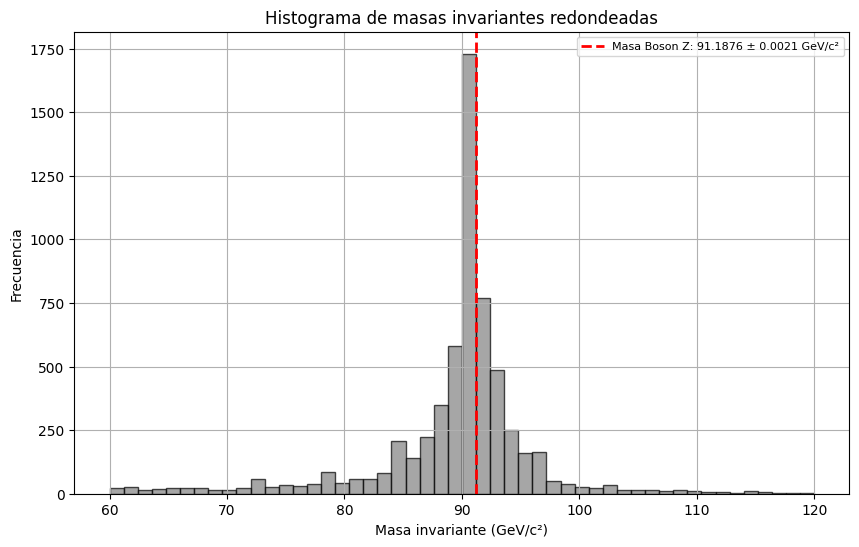

In [58]:
M_R2 = np.round(M_i4)

fig = px.histogram(
    x=M_R2,
    nbins=50,
    labels={'x': 'Masa invariante [GeV/c²]', 'y': 'Eventos'},
    title='Masa invariante para mejores candidatos para muones (Q1 ≠ Q2, iso <= 0.5)',
    color_discrete_sequence=['orange']
)
fig.add_vline(x=91, line_dash="dash", line_color="red", annotation_text="Masa del Z (91 GeV)")
fig.show()


plt.figure(figsize=(10, 6))
plt.hist(M_R2, bins=50, color='gray', edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

Mejorar hisogramas (añadirle grids de error)

Identificar que otras particulas puede haber

Correlacion angular entre muones y analisis de casos raros